In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py

from pywaffle import Waffle

py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
plt.style.use("fivethirtyeight")# for pretty graphs

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
#plt.rcParams['image.cmap'] = 'viridis'
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [3]:
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_conf1 = df_confirmed.copy()
df_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')
df_recov1 = df_recovered.copy()
df_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
df_deaths1 = df_deaths.copy()

# PRE PROCESSING CONFIRMED CASES

In [4]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,Unnamed: 71
0,NaN,Afghanistan,33,65.0000,0.0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,NaN
1,NaN,Albania,41.1533,20.1683,0.0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,NaN
2,NaN,Algeria,28.0339,1.6596,0.0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,NaN
3,NaN,Andorra,42.5063,1.5218,0.0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,NaN
4,NaN,Angola,-11.2027,17.8739,0.0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,NaN


In [5]:
df_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '02-01-2020', '02-02-2020', '02-03-2020',
       '02-04-2020', '02-05-2020', '02-06-2020', '02-07-2020', '02-08-2020',
       '02-09-2020', '02-10-2020', '02-11-2020', '02-12-2020', '2/13/20',
       '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20',
       '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20',
       '2/26/20', '2/27/20', '2/28/20', '2/29/20', '03-01-2020', '03-02-2020',
       '03-03-2020', '03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020',
       '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', 'Unnamed: 71'],
      dtype='object')

In [6]:
df_confirmed.drop(['Province/State','Lat','Long','Unnamed: 71'],axis=1,inplace=True)

In [7]:
df_confirmed.rename(columns= {'Country/Region':'Region'},inplace= True)

In [8]:
plot_countries = ['US','Italy','Korea, South']
df_conf_plot= df_confirmed[df_confirmed.Region.isin(plot_countries)]
df_conf_plot_T = df_conf_plot.T

In [11]:
df_conf_plot_T.head()

,137,143,225
Region,Italy,"Korea, South",US
1/22/20,0,1,1
1/23/20,0,1,1
1/24/20,0,2,1
1/25/20,0,2,2


In [12]:
df_conf_plot_T.rename(columns= {137:'Italy',143:'Korea, South',225:'US'},inplace= True)

In [13]:
df_conf_plot_T.drop(df_conf_plot_T.index[0],inplace=True)

In [14]:
df_conf_plot_T.index.name='DATE'

In [15]:
df_conf_plot_T.head()

,Italy,"Korea, South",US
DATE,,,
1/22/20,0,1,1
1/23/20,0,1,1
1/24/20,0,2,1
1/25/20,0,2,2
1/26/20,0,3,2


# PRE PROCESSING RECOVERED CASES

In [16]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,0,0,2,2,2,10,17,17,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,32,32,32,65,65,24,65,29,29,31
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_recovered.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '02-01-2020', '02-02-2020', '02-03-2020',
       '02-04-2020', '02-05-2020', '02-06-2020', '02-07-2020', '02-08-2020',
       '02-09-2020', '02-10-2020', '02-11-2020', '02-12-2020', '2/13/20',
       '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20',
       '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20',
       '2/26/20', '2/27/20', '2/28/20', '2/29/20', '03-01-2020', '03-02-2020',
       '03-03-2020', '03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020',
       '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20'],
      dtype='object')

In [18]:
df_recovered.drop(['Province/State','Lat','Long'],axis=1,inplace=True)

In [19]:
df_recovered.columns

Index(['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '02-01-2020',
       '02-02-2020', '02-03-2020', '02-04-2020', '02-05-2020', '02-06-2020',
       '02-07-2020', '02-08-2020', '02-09-2020', '02-10-2020', '02-11-2020',
       '02-12-2020', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20',
       '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20',
       '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20',
       '03-01-2020', '03-02-2020', '03-03-2020', '03-04-2020', '03-05-2020',
       '03-06-2020', '03-07-2020', '03-08-2020', '03-09-2020', '03-10-2020',
       '03-11-2020', '03-12-2020', '3/13/20', '3/14/20', '3/15/20', '3/16/20',
       '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20',
       '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20'],
      dtype='object')

In [20]:
df_recovered.rename(columns= {'Country/Region':'Region'},inplace= True)

In [21]:
df_recov_plot= df_recovered[df_recovered.Region.isin(plot_countries)]
df_recov_plot_T = df_recov_plot.T 
df_recov_plot_T.head()

,131,137,225
Region,Italy,"Korea, South",US
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0


In [22]:
df_recov_plot_T.rename(columns= {131:'Italy',137:'Korea, South',225:'US'},inplace= True)

In [23]:
df_recov_plot_T.drop(df_recov_plot_T.index[0],inplace=True)

In [24]:
df_recov_plot_T.index.name='DATE'

In [25]:
df_recov_plot_T.head()

,Italy,"Korea, South",US
DATE,,,
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0


# PRE PROCESSING DEATH CASES

In [26]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,Unnamed: 71
0,NaN,Afghanistan,33,65.0000,0.0,0,0,0,0,0,...,0,0,1,1,1,2,4,4,4,NaN
1,NaN,Albania,41.1533,20.1683,0.0,0,0,0,0,0,...,2,2,2,4,5,5,6,8,10,NaN
2,NaN,Algeria,28.0339,1.6596,0.0,0,0,0,0,0,...,11,15,17,17,19,21,25,26,29,NaN
3,NaN,Andorra,42.5063,1.5218,0.0,0,0,0,0,0,...,0,0,1,1,1,1,3,3,3,NaN
4,NaN,Angola,-11.2027,17.8739,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [27]:
df_deaths.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '02-01-2020', '02-02-2020', '02-03-2020',
       '02-04-2020', '02-05-2020', '02-06-2020', '02-07-2020', '02-08-2020',
       '02-09-2020', '02-10-2020', '02-11-2020', '02-12-2020', '2/13/20',
       '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20',
       '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20',
       '2/26/20', '2/27/20', '2/28/20', '2/29/20', '03-01-2020', '03-02-2020',
       '03-03-2020', '03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020',
       '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', 'Unnamed: 71'],
      dtype='object')

In [28]:
df_deaths.drop(['Province/State','Lat','Long','Unnamed: 71'],axis=1,inplace=True)

In [29]:
df_deaths.rename(columns= {'Country/Region':'Region'},inplace= True)

In [28]:
df_deaths.columns

Index(['Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '02-01-2020',
       '02-02-2020', '02-03-2020', '02-04-2020', '02-05-2020', '02-06-2020',
       '02-07-2020', '02-08-2020', '02-09-2020', '02-10-2020', '02-11-2020',
       '02-12-2020', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20',
       '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20',
       '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20',
       '03-01-2020', '03-02-2020', '03-03-2020', '03-04-2020', '03-05-2020',
       '03-06-2020', '03-07-2020', '03-08-2020', '03-09-2020', '03-10-2020',
       '03-11-2020', '03-12-2020', '3/13/20', '3/14/20', '3/15/20', '3/16/20',
       '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20',
       '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20'],
      dtype='object')

In [30]:
df_deaths_plot= df_deaths[df_deaths.Region.isin(plot_countries)]

In [31]:
df_deaths_plot_T = df_deaths_plot.T

In [32]:
df_deaths_plot_T.head()

,137,143,225
Region,Italy,"Korea, South",US
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0


In [33]:
df_deaths_plot_T.rename(columns= {137:'Italy',143:'Korea, South',225:'US'},inplace= True)
df_deaths_plot_T.drop(df_deaths_plot_T.index[0],inplace=True)
df_deaths_plot_T.index.name='DATE'
df_deaths_plot_T.head()

,Italy,"Korea, South",US
DATE,,,
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0


# COMPARE SPREAD ACROSS COUNTRIES

In [34]:
df_confirmed_All = df_conf_plot_T.copy()
df_recovered_All = df_recov_plot_T.copy()
df_deaths_All    = df_deaths_plot_T.copy()

In [35]:
XDate = df_confirmed_All.index
XDate_recov = df_recovered_All.index

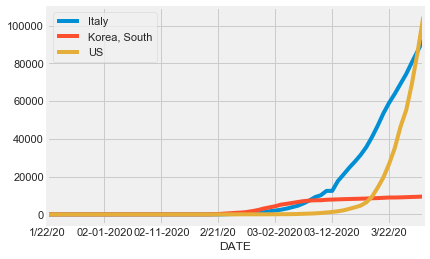

In [36]:
df_confirmed_All.plot()

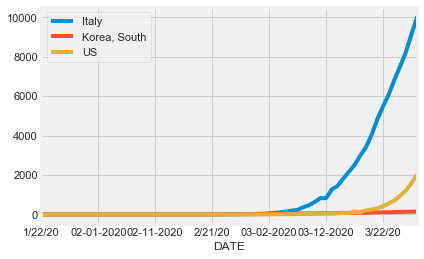

In [37]:
df_deaths_All.plot();

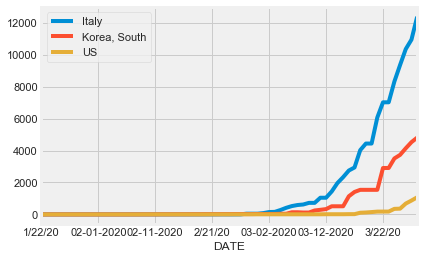

In [38]:
df_recov_plot_T.plot();

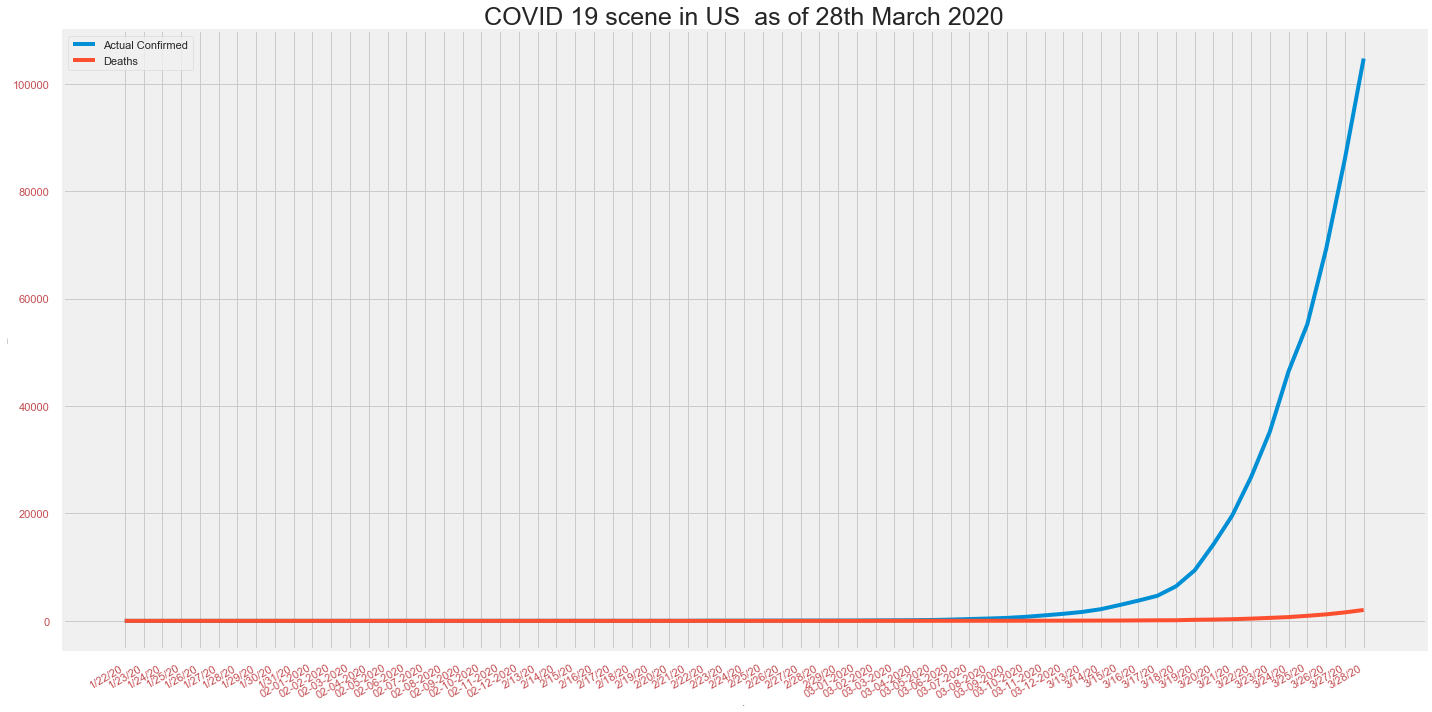

In [39]:
s1 = df_confirmed_All['US']
s2 = df_deaths_All['US']


fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(XDate, s1, label='Actual Confirmed')
ax.plot(XDate, s2, label = 'Deaths')
ax.legend()
ax.tick_params(direction='out', length=10, width=10, colors='r')
ax.set_xlabel('Date',fontsize=0.001)
ax.set_ylabel('Cases count',fontsize=0.01)
ax.set_title('COVID 19 scene in US  as of 28th March 2020',fontsize=25)
fig.autofmt_xdate()

ax.grid(True)
fig.tight_layout()

plt.show()

In [40]:
# Extract date DF for All countries 
df_confirmed_1 = df_confirmed_All.copy()
# Create date column 
df_confirmed_All['DATE'] = df_confirmed_All.index
df_confirmed_All.head()
# Create date DF 
DT_df = df_confirmed_All[['DATE']]
DT_df  = DT_df.set_index('DATE')

In [41]:
s_US  = df_confirmed_All['US']
s_Italy   = df_confirmed_All['Italy']
s_Korea   = df_confirmed_All['Korea, South']

In [43]:
n = 50  # cutoff case count for fitting model 
#------------------
US_DT_df         = DT_df[s_US >n]
Italy_DT_df      = DT_df[s_Italy >n]
Korea_DT_df      = DT_df[s_Korea >n]

In [44]:
US_DT_df['Date']         = US_DT_df.index
Italy_DT_df['Date']      = Italy_DT_df.index
Korea_DT_df['Date']      = Korea_DT_df.index

C:\Users\soura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\soura\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\soura\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [45]:
US_DT_s     = US_DT_df['Date']          
Italy_DT_s  = Italy_DT_df['Date']      
Korea_DT_s  = Korea_DT_df['Date']      

In [46]:
n = 50
#-------------------------------------------------
# US
s_US_GE100 = s_US[s_US > n] 
s_US_GE100 = pd.to_numeric(s_US_GE100, errors='coerce').fillna(0, downcast='infer')
#----------------------------------------------
#-------------------------------------------------
# Italy
s_Italy_GE100 = s_Italy[s_Italy > n] 
s_Italy_GE100 = pd.to_numeric(s_Italy_GE100, errors='coerce').fillna(0, downcast='infer')
#-------------------------------------------------
# Korea
s_Korea_GE100 = s_Korea[s_Korea > n] 
s_Korea_GE100 = pd.to_numeric(s_Korea_GE100, errors='coerce').fillna(0, downcast='infer')
#--------------------------------------------------

In [47]:
# Model US
import numpy as np
#--------------------------------------
# Y data 
Y = s_US_GE100
# X data 
X = np.arange(1,len(Y)+1)
Xdate = US_DT_s
# Fit 3rd Degree polynomial capture coefficients 
Z = np.polyfit(X, Y, 3)
# Generate polynomial function with these coefficients 
P = np.poly1d(Z)
# Generate X data for forecast 
XP = np.arange(1,len(Y)+8)
# Generate forecast 
YP = P(XP)
# Fit Curve
Yfit = P(X)

import datetime
start = Xdate[0]
#start
end_dt = datetime.datetime.strptime(Xdate[len(Xdate)-1], "%m/%d/%y")

end_date = datetime.datetime.strptime(str(end_dt),'%Y-%m-%d %H:%M:%S').date()

end_forecast_dt= end_dt + datetime.timedelta(days=7)

end_forecast =  datetime.datetime.strptime(str(end_forecast_dt),'%Y-%m-%d %H:%M:%S').date()
end_forecast
#
mydates = pd.date_range(start, end_forecast).to_list()
mydates_df = pd.DataFrame(mydates,columns =['Date']) 
mydates_df  = mydates_df.set_index('Date')
mydates_df['Date'] = mydates_df.index
X_FC = mydates_df['Date']

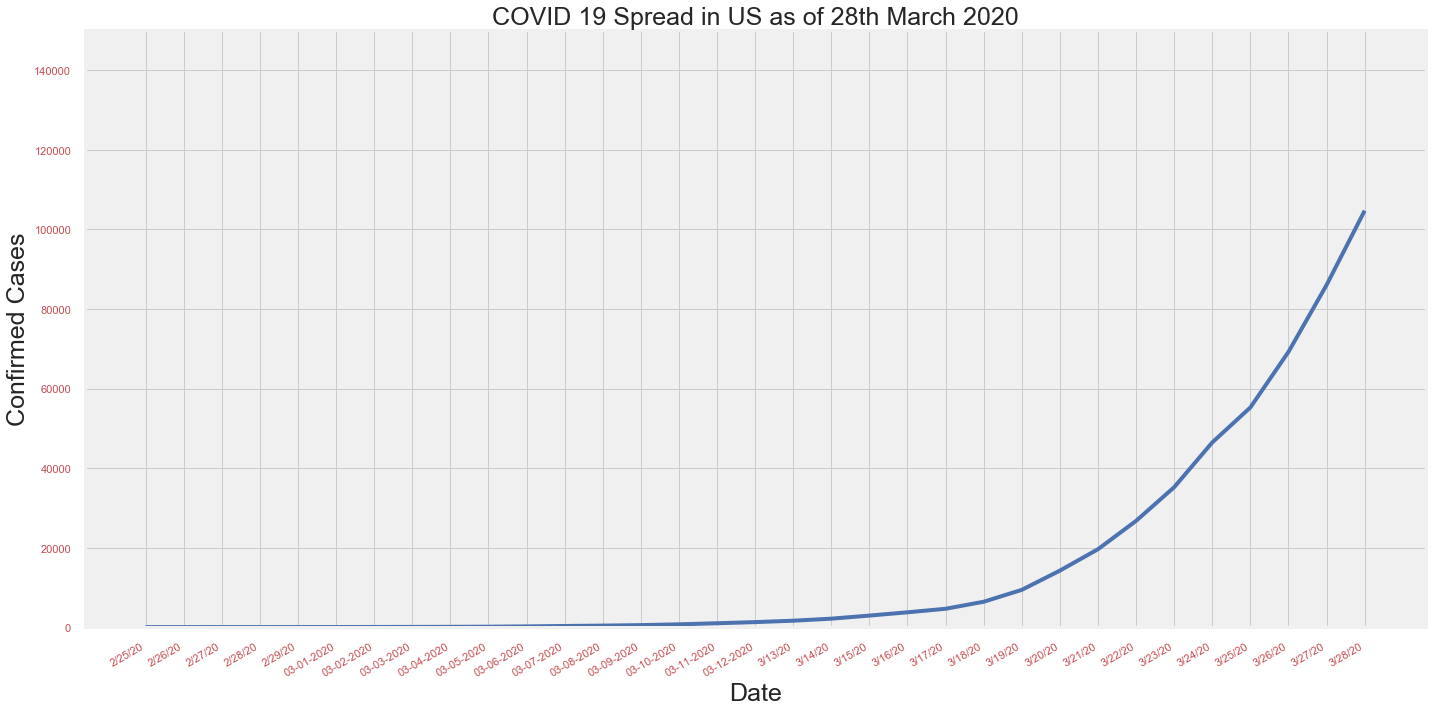

In [48]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(Xdate,Y,'b-')
ax.tick_params(direction='out', length=10, width=10, colors='r')
ax.set_xlabel('Date',fontsize=25)
ax.set_ylabel('Confirmed Cases',fontsize=25)
ax.set_title('COVID 19 Spread in US as of 28th March 2020',fontsize=25)
ax.set_ylim(0,150000)
fig.autofmt_xdate()

ax.grid(True)
fig.tight_layout()

plt.show()

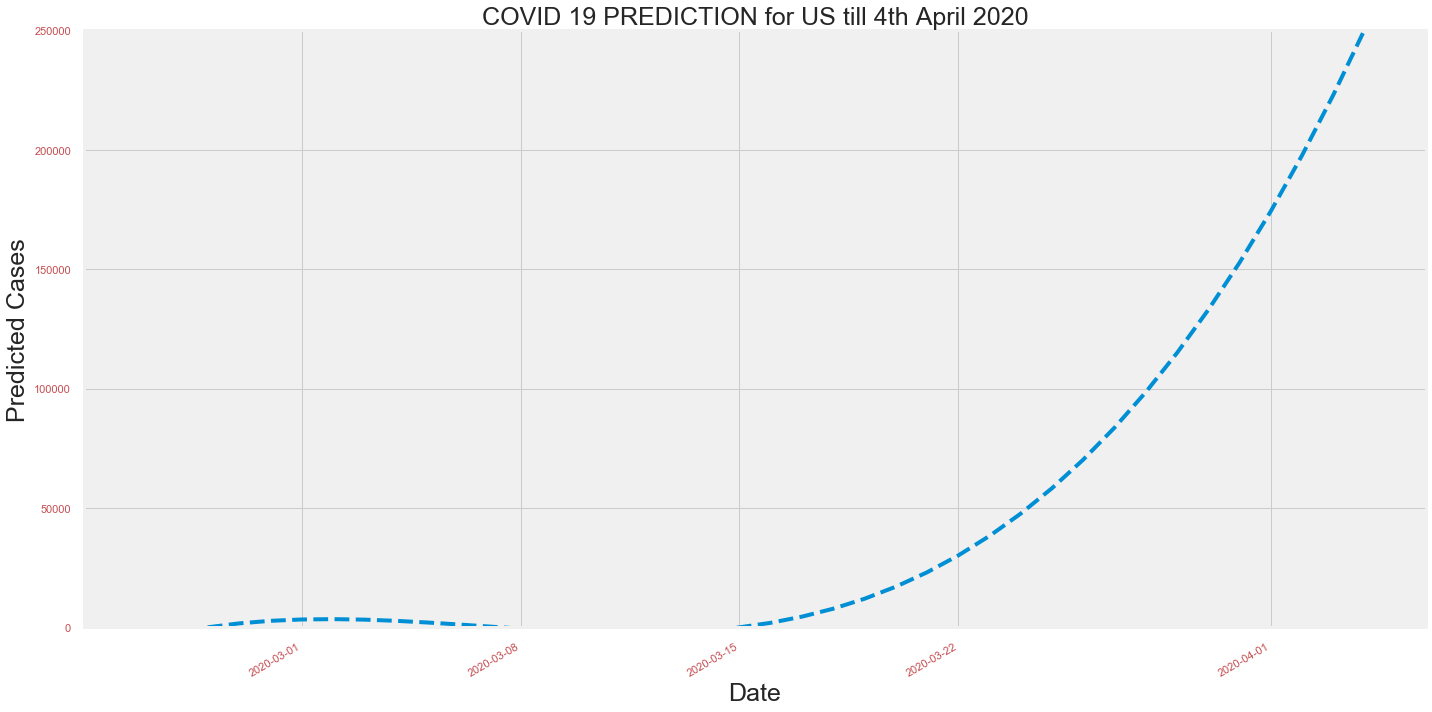

In [49]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(X_FC,YP,'--')
ax.tick_params(direction='out', length=10, width=10, colors='r')
ax.set_xlabel('Date',fontsize=25)
ax.set_ylabel('Predicted Cases',fontsize=25)
ax.set_ylim(0,250000)
ax.set_title('COVID 19 PREDICTION for US till 4th April 2020',fontsize=25)
fig.autofmt_xdate()

ax.grid(True)
fig.tight_layout()

plt.show()

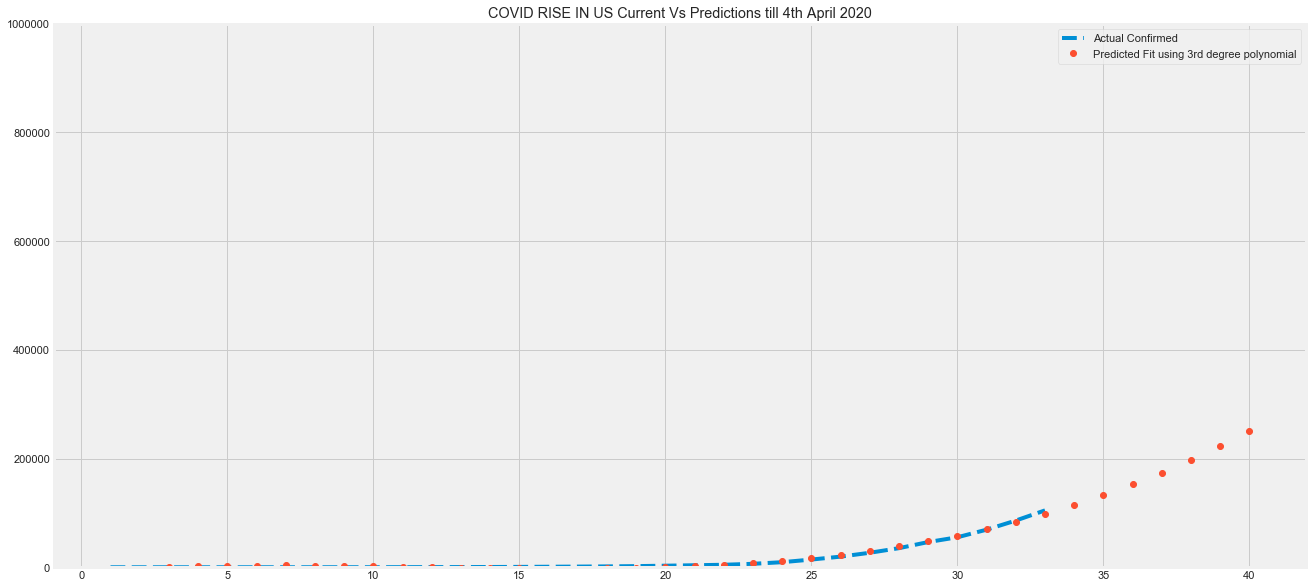

In [50]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(X, Y, '--',label='Actual Confirmed')
ax.plot(XP, YP, 'o',label='Predicted Fit using 3rd degree polynomial')
plt.title('COVID RISE IN US Current Vs Predictions till 4th April 2020')
ax.legend()
ax.set_ylim(0,1000000)
ax.grid(True)
plt.show()

In [51]:
# Create a dataframe from Predicted data 
dict1 = {'Date':X_FC,'Predicted_Cases':YP}
pred_df = pd.DataFrame.from_dict(dict1)
pred_df = pred_df[['Predicted_Cases']]
pred_df.Predicted_Cases = pred_df.Predicted_Cases.astype(int)
pred_df1 = pred_df.tail(n=7)
pred_df1.style.background_gradient()

,Predicted_Cases
Date,
2020-03-29 00:00:00,114938
2020-03-30 00:00:00,133000
2020-03-31 00:00:00,152768
2020-04-01 00:00:00,174314
2020-04-02 00:00:00,197713
2020-04-03 00:00:00,223038
2020-04-04 00:00:00,250361
